## 1.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\dataset.csv")

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df = pd.get_dummies(df, columns=['sex', 'cp'], drop_first=True)

In [17]:
scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [22]:
df.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_1,cp_1,cp_2,cp_3
0,0.952197,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1,1,0,0,1
1,-1.915313,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1,1,0,1,0
2,-1.474158,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1,0,1,0,0
3,0.180175,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1,1,1,0,0
4,0.290464,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1,0,0,0,0


In [23]:
X = df.drop('target', axis=1)
y = df['target']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
y_pred = rf_classifier.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [29]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8021978021978022
Precision: 0.82
Recall: 0.82
F1 Score: 0.82


In [30]:
import matplotlib.pyplot as plt

In [31]:
feature_importances = rf_classifier.feature_importances_

In [32]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

In [33]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [34]:
top_features = importance_df.head(5)

In [35]:
top_features

,Feature,Importance
9,ca,0.139400
5,thalach,0.114401
7,oldpeak,0.111963
10,thal,0.098846
6,exang,0.092939


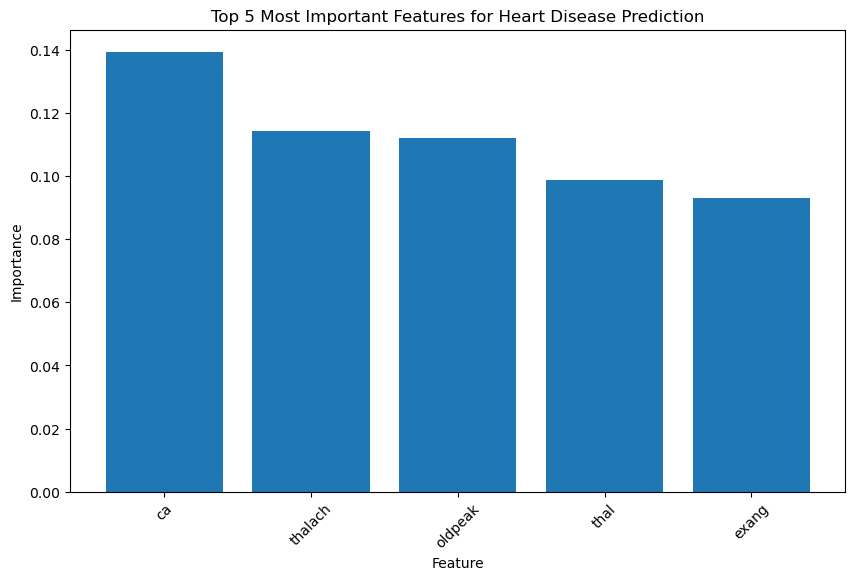

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.xticks(rotation=45)
plt.show()

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
rf_classifier = RandomForestClassifier(random_state=42)

In [39]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [40]:
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=20, scoring='accuracy', cv=5, 
                                   n_jobs=-1, random_state=42
)

In [41]:
random_search.fit(X_train, y_train)

best_params = random_search.best_params_

In [42]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}


In [43]:
best_rf_classifier = random_search.best_estimator_

In [45]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, scoring='accuracy', cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90697674 0.8372093  0.76190476 0.88095238 0.76190476]
Mean Cross-Validation Accuracy: 0.8297895902547066


In [46]:
y_pred_tuned = best_rf_classifier.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

In [49]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [50]:
y_pred_default = rf_classifier.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

In [51]:
print("Best Hyperparameters:", best_params)
print("\nTuned Model Performance:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

print("\nDefault Model Performance:")
print("Accuracy:", accuracy_default)
print("Precision:", precision_default)
print("Recall:", recall_default)
print("F1 Score:", f1_default)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5}

Tuned Model Performance:
Accuracy: 0.8351648351648352
Precision: 0.8301886792452831
Recall: 0.88
F1 Score: 0.8543689320388349

Default Model Performance:
Accuracy: 0.7912087912087912
Precision: 0.8297872340425532
Recall: 0.78
F1 Score: 0.8041237113402062


In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
top_two_features = importance_df.head(2)['Feature'].tolist()

In [55]:
df_plot = df[top_two_features + ['target']]

In [56]:
X_plot = df_plot[top_two_features]
y_plot = df_plot['target']

In [63]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 3.3 MB/s eta 0:00:00


In [64]:
from mlxtend.plotting import plot_decision_regions

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


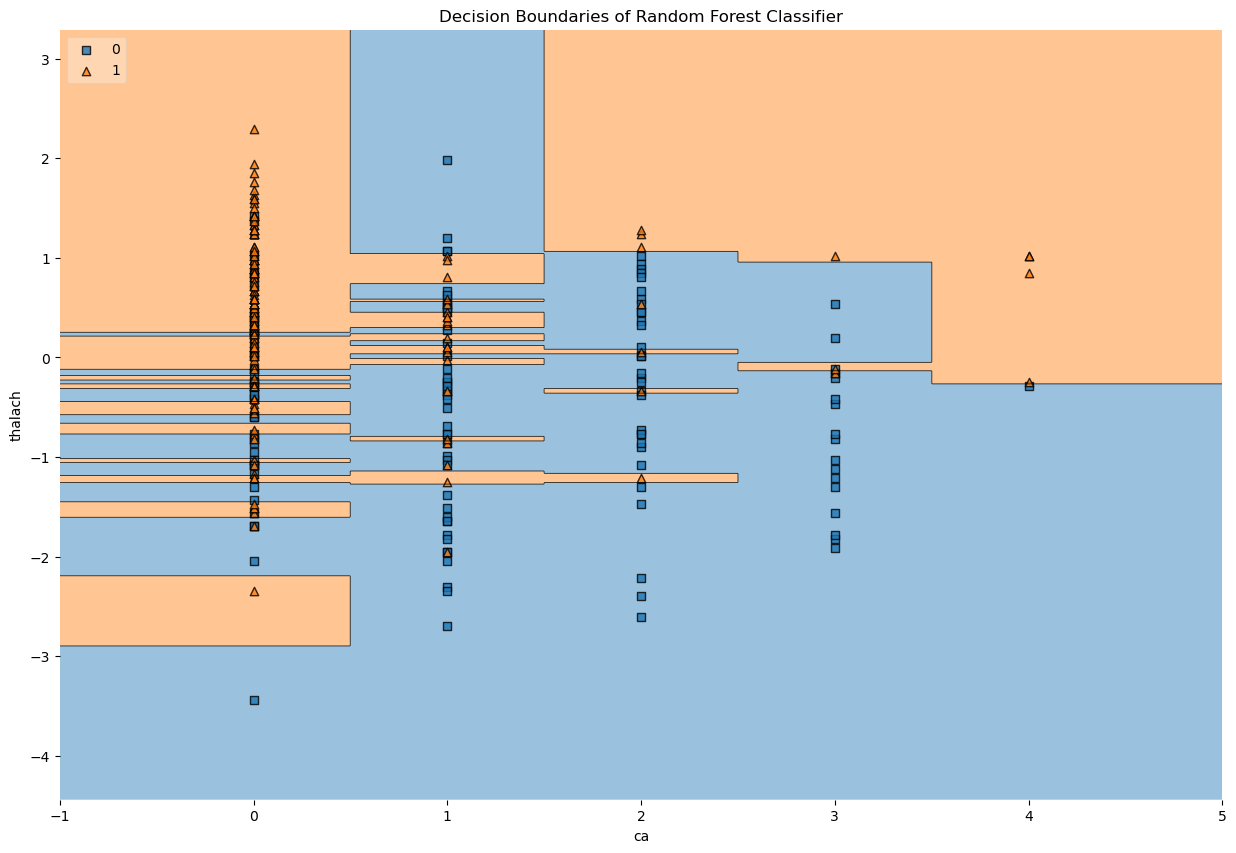

In [66]:
rf_classifier_plot = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier_plot.fit(X_plot, y_plot)

plt.figure(figsize=(15,10))
plot_decision_regions(X_plot.values, y_plot.values, clf=rf_classifier_plot, legend=2)
plt.xlabel(top_two_features[0])
plt.ylabel(top_two_features[1])
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()

Now, let's discuss the insights and limitations of the model for predicting heart disease risk based on the decision boundaries:

Insights:

1. Decision boundaries are non-linear: Random forests are capable of modeling complex, non-linear decision boundaries. This is evident in the scatter plot, where the decision boundaries are not simple straight lines but more intricate curves.
2. Separation of classes: The model appears to do a reasonable job of separating the two classes (heart disease present vs. not present) based on the two most important features. The regions belonging to different classes are distinct, indicating that the model has captured the patterns present in these features.
3. Local regions of uncertainty: In some areas of the feature space, the decision boundaries are more diffuse, indicating areas of uncertainty. This is natural since some data points near the boundary might be harder to classify confidently.

Limitations:

1. Interpretability: Although visualizing decision boundaries can provide some insights, random forests are inherently difficult to interpret due to their ensemble nature. It's challenging to understand the specific relationships between features and the target variable, especially in high-dimensional spaces.
2. Feature importance does not imply causality: While we identified the top important features, it's essential to remember that feature importance scores are relative and do not imply causality. It's crucial to conduct domain-specific research to establish causal relationships.
3. Data dimensionality: The scatter plot with two features is a simplified representation. In reality, the dataset has more dimensions, which makes visualization challenging. Decision boundaries in higher-dimensional spaces may become even more complex.